In [15]:
import os

os.environ["EQX_ON_ERROR"] = "nan"
import sys

import healpy as hp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from jax_healpy import get_clusters
from matplotlib.patches import Patch

sys.path.append("../data")
from generate_maps import get_mask

<Figure size 1000x500 with 0 Axes>

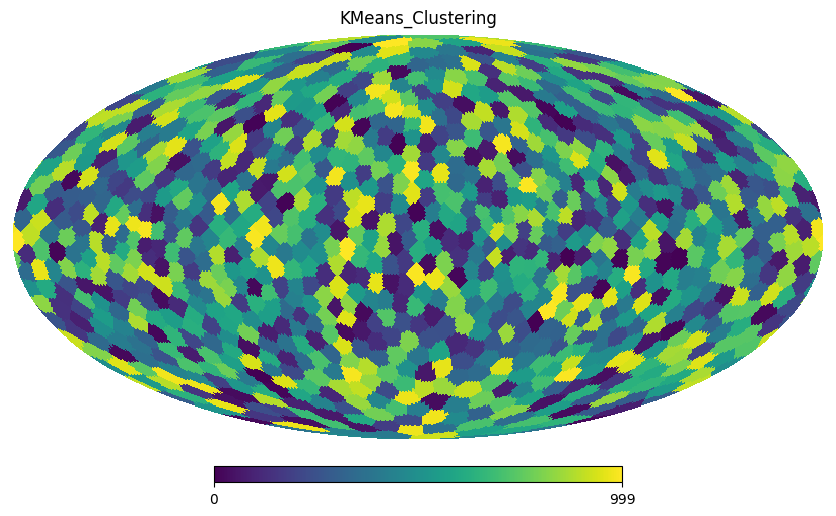

In [17]:
nside = 64
npixels = hp.nside2npix(nside)

mask = jnp.ones(npixels)
(indices,) = jnp.where(mask == 1)

full_map = get_clusters(mask, indices, 1000, jax.random.PRNGKey(0), max_centroids=1000)

# Set up subplots
fig = plt.figure(figsize=(10, 5))
# Plot each map
hp.mollview(full_map, title="KMeans_Clustering", bgcolor=(0.0,) * 4)
# Display the plot
plt.savefig("kmeans_clustering.pdf", dpi=1200, bbox_inches="tight", transparent=True)
plt.show()

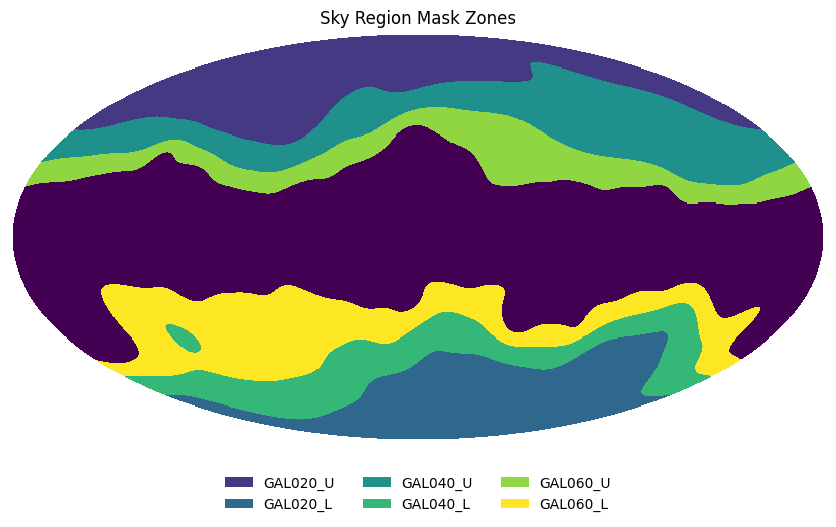

In [ ]:
# Load binary masks
gal020_u = get_mask("GAL020_U", nside=2048)
gal020_l = get_mask("GAL020_L", nside=2048)
gal040_u = get_mask("GAL040_U", nside=2048)
gal040_l = get_mask("GAL040_L", nside=2048)
gal060_u = get_mask("GAL060_U", nside=2048)
gal060_l = get_mask("GAL060_L", nside=2048)

# Combine into a single labeled mask
full_mask = gal020_u * 1 + gal020_l * 2 + gal040_u * 3 + gal040_l * 4 + gal060_u * 5 + gal060_l * 6

# Labels and matching values
labels = [
    "GAL020_U",
    "GAL020_L",
    "GAL040_U",
    "GAL040_L",
    "GAL060_U",
    "GAL060_L",
]
values = [1, 2, 3, 4, 5, 6]

# Plot using default mollview settings (uses viridis automatically)
hp.mollview(full_mask, title="Sky Region Mask Zones", min=0, max=6, cbar=False, bgcolor=(0.0,) * 4)

# Get the default colormap and compute colors for the integer zones
cmap = plt.cm.viridis
normed_vals = np.array(values) / 6  # Normalize to [0, 1]
colors = [cmap(val) for val in normed_vals]

# Create custom legend
legend_elements = [Patch(facecolor=color, label=label) for label, color in zip(labels, colors)]

# Add the legend under the map
plt.legend(
    handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False
)

plt.savefig("sky_region_mask_zones.pdf", dpi=1200, bbox_inches="tight", transparent=True)
plt.show()

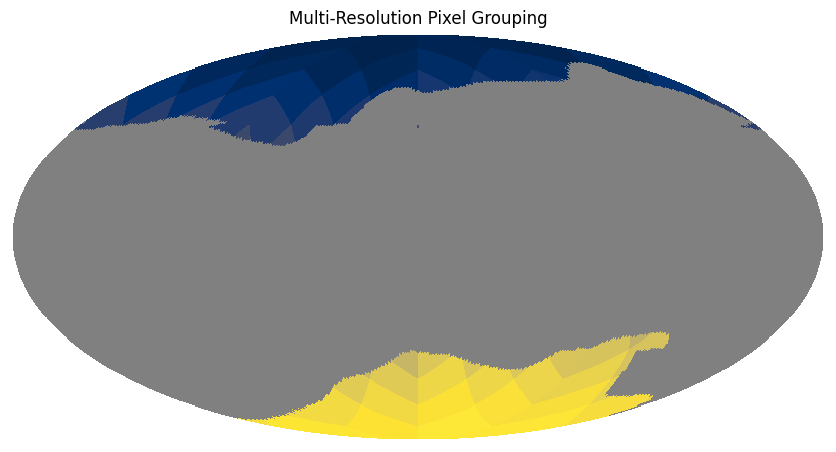

In [ ]:
# Load binary masks

gal020 = np.array(get_mask("GAL020", nside=64))
nside = 64
npix = nside**2 * 12
ipix = np.arange(npix)


def ud_grade(ipix, nside_in, nside_out):
    if nside_out == 0:
        return np.zeros_like(ipix)
    else:
        lowered = hp.ud_grade(ipix, nside_out=nside_out)
        return hp.ud_grade(lowered, nside_out=nside_in)


ud_beta_d_map = ud_grade(ipix, nside, 4).astype(np.float64)

(indices,) = np.where(gal020 == 0)


def normalize_array(arr):
    unique_vals, indices = np.unique(arr, return_inverse=True)
    return indices.astype(np.float64)


ud_beta_d_map = normalize_array(ud_beta_d_map)
ud_beta_d_map[indices] = hp.UNSEEN


hp.mollview(
    ud_beta_d_map,
    title="Multi-Resolution Pixel Grouping",
    cmap="cividis",  # or "cubehelix", "YlGnBu", "Greys", etc.
    cbar=False,
)
plt.savefig("multi_resolution_pixel_grouping.pdf", dpi=1200, bbox_inches="tight", transparent=True)